In [94]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt
import seaborn as sns


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [95]:
import pandas as pd
from pathlib import Path
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [96]:
BASE_PATH = Path("/home/user/PycharmProjects/training/titanic")

TRAIN_PATH =  BASE_PATH / "train.csv"
TEST_PATH = BASE_PATH / "test.csv"
GENDER_SUBMISSION_PATH = BASE_PATH / "gender_submission.csv"

In [97]:
# load
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)
gender_sub_df = pd.read_csv(GENDER_SUBMISSION_PATH)

In [98]:
# Run BASELINE - fit predict ~ 80 acc
X = train_df.drop("Survived", axis=1, inplace=False)
X.drop("Name", axis=1, inplace=True)
X.Sex = X.Sex.map({"male":1, "female":-1})
X.Embarked = X.Embarked.map({"Q":1, "S":2, "C":3})

X.drop("Ticket", axis=1, inplace=True)
X.drop("Cabin", axis=1, inplace=True)
    

X=X.fillna(0) # HACK to reslove Input contains NaN, infinity or a value too large for dtype('float32').

y = train_df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


clf = RandomForestClassifier(random_state=6)
clf.fit(X_train, y_train)
y_hat = clf.predict(X_test)
print(f"accuracy_score(y_test, y_hat) = {accuracy_score(y_test, y_hat)}")
print(f"f1_score(y_test, y_hat) = {f1_score(y_test, y_hat)}")
print(f"recall_score(y_test, y_hat) = {recall_score(y_test, y_hat)}")
print(f"precision_score(y_test, y_hat) = {precision_score(y_test, y_hat)}")


accuracy_score(y_test, y_hat) = 0.8203389830508474
f1_score(y_test, y_hat) = 0.7534883720930232
recall_score(y_test, y_hat) = 0.675
precision_score(y_test, y_hat) = 0.8526315789473684


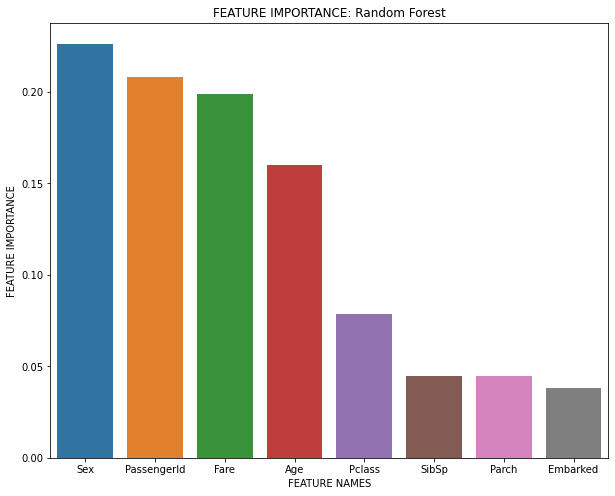

In [101]:
#Create arrays from feature importance and feature names
feature_importance = np.array(clf.feature_importances_)
feature_names = np.array(X_train.columns)

# #Create a DataFrame using a Dictionary
data={'feature_names':feature_names,'feature_importance':feature_importance}
fi_df = pd.DataFrame(data)

# #Sort the DataFrame in order decreasing feature importance
fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

#Define size of bar plot
plt.figure(figsize=(10,8))
#Plot Searborn bar chart
sns.barplot(y=fi_df['feature_importance'], x=fi_df['feature_names'])
#Add chart labels
plt.title("FEATURE IMPORTANCE: Random Forest")
plt.xlabel('FEATURE NAMES')
plt.ylabel('FEATURE IMPORTANCE')
_=_